In [47]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport plotter
%aimport

Modules to reload:
plotter

Modules to skip:



In [48]:
import plotter
from functools import partial as at
import os
import pandas
import numpy

In [49]:
xaxis = "Sampling threshold"
n, p, s = {}, {}, {}

path = ".."

for file in os.listdir(path):
    weight = plotter.property_key("c")(file)
    if weight == "degreesquared":
        all_data = pandas.read_csv(
            os.path.join(path, file),
            sep=",",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')
        for language_id, data in all_data.groupby("Language_ID"):
            if int(language_id) > 8e6:
                data.sort_values(by="Weight", inplace=True)
                words = data.reset_index(drop=True)
                best_words = words.groupby("Feature_ID").last()["Weight"]
                words["compare_to"] = (best_words[words["Feature_ID"]].reset_index(drop=True))
                words["relative_weight"] = words["Weight"] / words["compare_to"]
                above_threshold = words
                for theta in range(0, 240, 20):
                    above_threshold = above_threshold[above_threshold["Weight"] > theta]
                    
                    n.setdefault(theta, []).append(
                        len(set(above_threshold["Cognate_Set"])))
                    p.setdefault(theta, []).append(
                        above_threshold.groupby("Feature_ID")["Cognate_Set"].count().mean())
                    s.setdefault(theta, []).append(
                        above_threshold.groupby("Cognate_Set")["Feature_ID"].count().mean())


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
labels = sorted(n.keys(), key=float)
print(labels)

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]


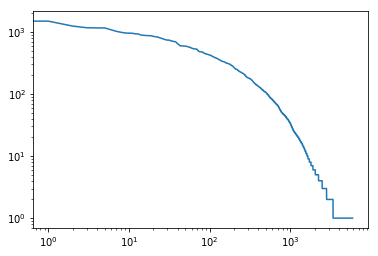

In [51]:
from matplotlib import pyplot as plt
words.sort_values(by="Weight", ascending=False)["Weight"].reset_index(drop=True).plot(loglog=True)
plt.savefig("loglog_weight_rank.pdf")


{0: 1368.2777777777778,
 20: 675.6111111111111,
 40: 572.6666666666666,
 60: 478.44444444444446,
 80: 413.3888888888889,
 100: 366.44444444444446,
 120: 326.05555555555554,
 140: 287.77777777777777,
 160: 260.72222222222223,
 180: 233.38888888888889,
 200: 210.27777777777777,
 220: 194.16666666666666}

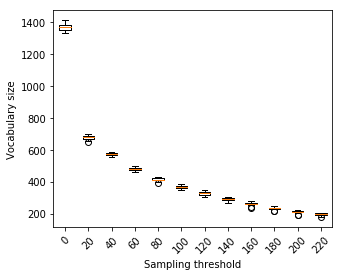

In [52]:
plotter.plot_something(n, labels, xaxis, "Vocabulary size")
{k: numpy.mean(v) for k, v in n.items()}

{0: 4.238165876093829,
 20: 1.7861000903291466,
 40: 1.5790712462806438,
 60: 1.4980562602393512,
 80: 1.4469082061250624,
 100: 1.411358347647468,
 120: 1.3746273287569732,
 140: 1.3575644628103785,
 160: 1.342977571239793,
 180: 1.3307951186055509,
 200: 1.3255111018328094,
 220: 1.3033162769590896}

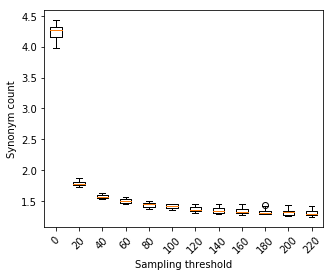

In [53]:
plotter.plot_something(s, labels, xaxis, "Synonym count")
{k: numpy.mean(v) for k, v in s.items()}

{0: 3.8326814440177595,
 20: 1.1630164918146664,
 40: 1.0673594656854022,
 60: 1.0345653313289205,
 80: 1.0216052129939246,
 100: 1.0138201997262373,
 120: 1.0082368176242913,
 140: 1.0045540849515608,
 160: 1.0028313925402808,
 180: 1.0019341276417368,
 200: 1.0007888378185736,
 220: 1.0}

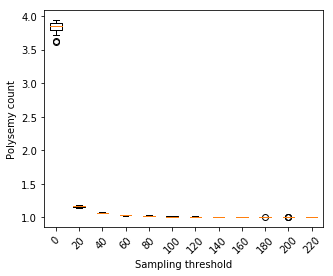

In [54]:
plotter.plot_something(p, labels, xaxis, "Polysemy count")
{k: numpy.mean(v) for k, v in pO.items()}